In [3]:
import os
# numerical computing package
import numpy as np
# 
from scipy import stats
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.07/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [5]:
!pwd

/home/561/erd561/mom/gfdl_nyf_1080_hist_5069


In [6]:
figures_path = '/home/561/erd561/figures/SAMexp/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_path = '/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/'

remote_path_ctrl = '/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/'



Figures will be saved in: /home/561/erd561/figures/SAMexp/s01_gfdl_diagnostics



In [7]:
%%time

from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:43795' processes=8 cores=8>
CPU times: user 1.13 s, sys: 235 ms, total: 1.37 s
Wall time: 11.7 s


In [23]:
# ice_daily, ice_month, ocean_bgc_2d, ocean_bgc_carbon, ocean_bgc_daily,
# ocean_bgc_npzd, ocean_cfc, ocean_force, ocean_global, ocean_month, ocean_surface

nyf_years = np.arange(477, 487)
ctrl_years = np.arange(501, 576)
hist5069_years = np.arange(501, 576)
rcp85_years = np.arange(501, 576)

years = np.append(np.arange(1-len(nyf_years), 0), np.arange(0, len(ctrl_years)+1))
print(years)
print(len(years))

var1 = 'ice_month'
path1 = []

var21 = 'ocean'
var22 = 'ocean_month'
path2 = []

# var31 = 'ocean'
# var32 = 'ocean_month'
# path3 = []

for y in nyf_years:
    path1.append(remote_path_ctrl + 'output' + str(y) + '/' + var1 + '.nc')
    path2.append(remote_path_ctrl + 'output' + str(y) + '/' + var21 + '.nc')
#     path3.append(remote_path_ctrl + 'output' + str(y) + '/' + var31 + '.nc')


for y in ctrl_years:
    path1.append(remote_path + 'output' + str(y) + '/' + var1 + '.nc')
    path2.append(remote_path + 'output' + str(y) + '/' + var22 + '.nc')
#     path3.append(remote_path + 'output' + str(y) + '/' + var32 + '.nc')

    
for p1,p2 in zip(path1,path2):
    print(p1)
    print(p2)
#     print(p3)


[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75]
85
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ocean.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output482/ice_month.nc
/g/data/v

In [24]:
%%time

sst = []
for p in path1:
    if p == path1[0]:
        sst = \
            xr.open_dataset(p, decode_times=False).\
            SST.\
            mean(dim='time')
        print(str(p) + ' OK')
            
    else:
        sst = \
            xr.concat([
                sst,
                xr.open_dataset(p, decode_times=False).\
                SST.\
                mean(dim='time')
            ], 'year'
            )
        print(str(p) + ' OK')
print(sst.shape)

sst = sst.assign_coords(year=years)

sst_all = sst.\
    mean(dim=('yt', 'xt'))

lon_GAB = [116, 146.5]
lat_GAB = [-42.5, -30] 
sst_GAB = \
    sst.\
    sel(yt=slice(lat_GAB[0],lat_GAB[1]), 
        xt=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yt', 'xt'))

lon_TS = [146.5, 155]
lat_TS = [-45, -35]
sst_TS = \
    sst.\
    sel(yt=slice(lat_TS[0],lat_TS[1]), 
        xt=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yt', 'xt'))

lon_LC = [110, 116]
lat_LC = [-35, -20]
sst_LC = \
    sst.\
    sel(yt=slice(lat_LC[0],lat_LC[1]), 
        xt=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yt', 'xt'))
print(sst_LC.shape)
print(sst_LC)



/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output482/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output483/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output484/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output485/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output486/ice_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output501/ice_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output502/ice_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output503/ice_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/

In [25]:
%%time

for p in path2:
    if p == path2[0]:
        drake = \
            xr.open_dataset(p, decode_times=False).\
            tx_trans.\
            sel(xu_ocean=-70, method='nearest').\
            sel(yt_ocean=slice(-70,-55)).\
            mean(dim=('time')).\
            sum(dim=('st_ocean')).\
            cumsum(dim=('yt_ocean')).\
            max()
        print(str(p) + ' OK')
            
    else:
        drake = \
            xr.concat([
                drake,
                xr.open_dataset(p, decode_times=False).\
                tx_trans.\
                sel(xu_ocean=-70, method='nearest').\
                sel(yt_ocean=slice(-70,-55)).\
                mean(dim=('time')).\
                sum(dim=('st_ocean')).\
                cumsum(dim=('yt_ocean')).\
                max()
            ], 'year'
            )
        print(str(p) + ' OK')

drake = drake.assign_coords(year=years)
print(drake)

/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output482/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output483/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output484/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output485/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output486/ocean.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output501/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output502/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output503/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output504/ocean_month.nc O

In [26]:
for p in path2:
    if p == path2[0]:
        amoc = \
            xr.open_dataset(p, decode_times=False).\
            ty_trans_rho.\
            sel(grid_yu_ocean=slice(-60,-20)).\
            sel(potrho=slice(1035.5,1037)).\
            mean(dim=('time')).\
            sum(dim=('grid_xt_ocean')).\
            cumsum(dim=('potrho')).\
            mean(dim='grid_yu_ocean').\
            max()
        
        print(str(p) + ' OK')
            
    else:
        amoc = \
            xr.concat([
                amoc,
                xr.open_dataset(p, decode_times=False).\
                ty_trans_rho.\
                sel(grid_yu_ocean=slice(-60,-20)).\
                sel(potrho=slice(1035.5,1037)).\
                mean(dim=('time')).\
                sum(dim=('grid_xt_ocean')).\
                cumsum(dim=('potrho')).\
                mean(dim='grid_yu_ocean').\
                max()
            ], 'year'
            )
        print(str(p) + ' OK')

amoc = amoc.assign_coords(year=years)
print(amoc)

/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output482/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output483/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output484/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output485/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output486/ocean.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output501/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output502/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output503/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output504/ocean_month.nc O

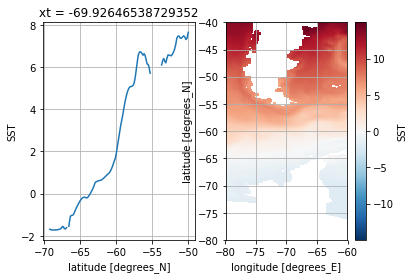

In [21]:
plt.subplot(1,2,1)
sst.sel(xt=-70, method='nearest').sel(yt=slice(-80,-40)).plot()
plt.grid()

plt.subplot(1,2,2)
sst.sel(xt=slice(-80,-60)).sel(yt=slice(-80,-40)).plot()
plt.grid()

CPU times: user 3.05 s, sys: 1.77 s, total: 4.82 s
Wall time: 2.61 s


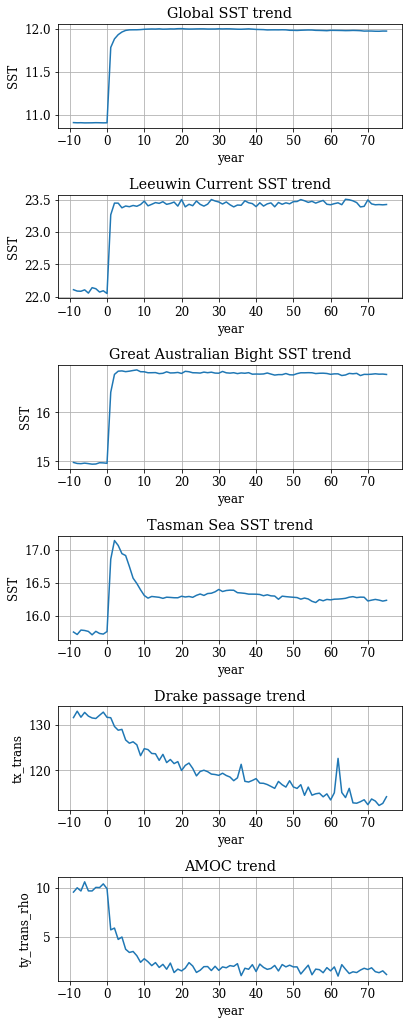

In [31]:
%%time

matplotlib.rcParams.update({'font.size': 12}) 
row = 6
col = 1
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(6,16)


##
ax = plt.subplot(row,col,1)
sst_all.plot()
plt.title('Global SST trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-10,80,10))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_LC_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


##
ax = plt.subplot(row,col,2)
sst_LC.plot()
plt.title('Leeuwin Current SST trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-10,80,10))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_LC_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


##
ax = plt.subplot(row,col,3)
sst_GAB.plot()
plt.title('Great Australian Bight SST trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-10,80,10))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_GAB_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


##
ax = plt.subplot(row,col,4)
sst_TS.plot()
plt.title('Tasman Sea SST trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-10,80,10))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_TS_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


##
ax = plt.subplot(row,col,5)
drake.plot()
plt.title('Drake passage trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-10,80,10))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_TS_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


##
ax = plt.subplot(row,col,6)
amoc.plot()
plt.title('AMOC trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-10,80,10))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_TS_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


fig.tight_layout(rect=[0, 0, 1, 0.90])
output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_.png', bbox_inches='tight', dpi=200)




In [57]:
for p in path2[0:2]:
    if p == path2[0]:
        amoc_nyf_z_years = xr.open_dataset(p, decode_times=False).\
            ty_trans.\
            mean(dim=('time')).\
            sum(dim=('xt_ocean')).\
            cumsum(dim=('st_ocean'))
        amoc_nyf_rho_years = xr.open_dataset(p, decode_times=False).\
            ty_trans_rho.\
            mean(dim=('time')).\
            sum(dim=('grid_xt_ocean')).\
            cumsum(dim=('potrho'))
        print(str(p) + ' OK')
        
    else:
        amoc_nyf_z_years = \
            xr.concat([
            amoc_nyf_z_years,
            xr.open_dataset(p, decode_times=False).\
            ty_trans.\
            mean(dim=('time')).\
            sum(dim=('xt_ocean')).\
            cumsum(dim=('st_ocean'))
            ], 'year'
            )
        amoc_nyf_rho_years = \
            xr.concat([
            amoc_nyf_rho_years,
            xr.open_dataset(p, decode_times=False).\
            ty_trans_rho.\
            mean(dim=('time')).\
            sum(dim=('grid_xt_ocean')).\
            cumsum(dim=('potrho'))
            ], 'year'
            )
        print(str(p) + ' OK')

amoc_nyf_z = amoc_nyf_z_years.mean(dim='year')
amoc_nyf_rho = amoc_nyf_rho_years.mean(dim='year')
        
for p in path2[-10:-8]:
    if p == path2[-10]:
        amoc_hist5069_z_years = xr.open_dataset(p, decode_times=False).\
            ty_trans.\
            mean(dim=('time')).\
            sum(dim=('xt_ocean')).\
            cumsum(dim=('st_ocean'))
        amoc_hist5069_rho_years = xr.open_dataset(p, decode_times=False).\
            ty_trans_rho.\
            mean(dim=('time')).\
            sum(dim=('grid_xt_ocean')).\
            cumsum(dim=('potrho'))
        print(str(p) + ' OK')
        
    else:
        amoc_hist5069_z_years = \
            xr.concat([
            amoc_hist5069_z_years,
            xr.open_dataset(p, decode_times=False).\
            ty_trans.\
            mean(dim=('time')).\
            sum(dim=('xt_ocean')).\
            cumsum(dim=('st_ocean'))
            ], 'year'
            )
        amoc_hist5069_rho_years = \
            xr.concat([
            amoc_hist5069_rho_years,
            xr.open_dataset(p, decode_times=False).\
            ty_trans_rho.\
            mean(dim=('time')).\
            sum(dim=('grid_xt_ocean')).\
            cumsum(dim=('potrho'))
            ], 'year'
            )
        print(str(p) + ' OK')
        
amoc_hist5069_z = amoc_hist5069_z_years.mean(dim='year')
amoc_hist5069_rho = amoc_hist5069_rho_years.mean(dim='year')        
        


/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ocean.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ocean.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output566/ocean_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output567/ocean_month.nc OK


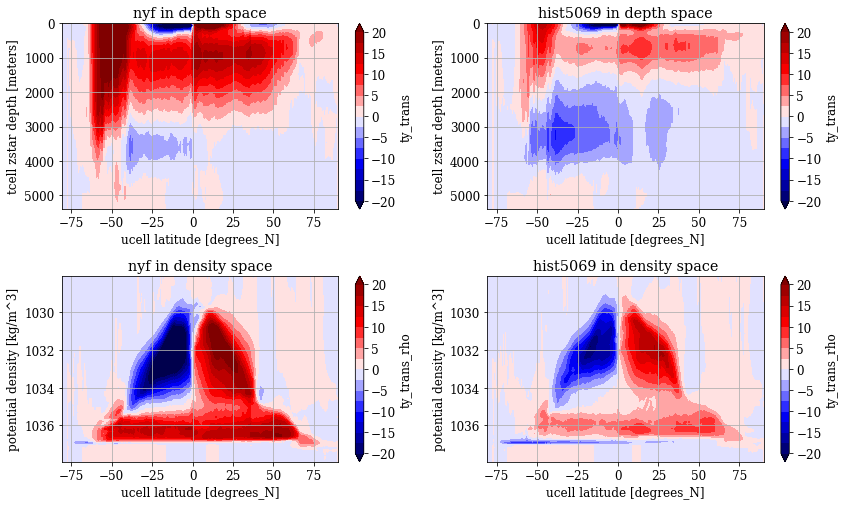

In [58]:
plt.close('all')
fig = plt.figure() 
fig.set_size_inches(12,8)

plt.subplot(2,2,1)
cont = amoc_nyf_z.plot.contourf(levels=np.arange(-20,22.5,2.5), cmap=plt.cm.seismic)
# plt.clabel(cont, fmt='%.1f', colors='black', fontsize=6)
plt.grid()
plt.gca().invert_yaxis()
plt.title('nyf in depth space')

plt.subplot(2,2,3)
amoc_nyf_rho.plot.contourf(levels=np.arange(-20,22.5,2.5), cmap=plt.cm.seismic)
plt.grid()
plt.gca().invert_yaxis()
plt.title('nyf in density space')

plt.subplot(2,2,2)
amoc_hist5069_z.plot.contourf(levels=np.arange(-20,22.5,2.5), cmap=plt.cm.seismic)
plt.grid()
plt.gca().invert_yaxis()
plt.title('hist5069 in depth space')

plt.subplot(2,2,4)
amoc_hist5069_rho.plot.contourf(levels=np.arange(-20,22.5,2.5), cmap=plt.cm.seismic, 
                                extend='both')
plt.grid()
plt.gca().invert_yaxis()
plt.title('hist5069 in density space')


fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_.png', bbox_inches='tight', dpi=200)